# Imporing Libraries and Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [8]:
data_train= pd.read_csv(r"C:\Users\shruti\Desktop\Decodr Session Recording\Project\Decodr Project\Power Plant Data Analysis\train.csv", delimiter=",")

In [9]:
data_train.head()

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [10]:
data_train.shape

(7176, 5)

In [11]:
y_train= data_train[" EP"]

In [12]:
del data_train[" EP"]

In [13]:
data_train.head()

,# T,V,AP,RH
0,8.58,38.38,1021.03,84.37
1,21.79,58.20,1017.21,66.74
2,16.64,48.92,1011.55,78.76
3,31.38,71.32,1009.17,60.42
4,9.20,40.03,1017.05,92.46


In [14]:
y_train.head()

0    482.26
1    446.94
2    452.56
3    433.44
4    480.38
Name:  EP, dtype: float64

# Structure of Dataset

In [15]:
data_train.describe()

,# T,V,AP,RH
count,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818
std,7.475256,12.751468,5.964863,14.625093
min,1.810000,25.360000,992.890000,25.560000
25%,13.470000,41.740000,1009.010000,63.202500
50%,20.315000,52.050000,1012.910000,74.895000
75%,25.720000,66.540000,1017.302500,84.925000
max,35.770000,81.560000,1033.300000,100.160000


In [16]:
y_train.shape

(7176,)

# Checking for Null values

In [17]:
data_train.isnull().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

In [18]:
data_train.isna().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

In [19]:
y_train.isnull().sum()

0

In [20]:
y_train.isna().sum()

0

# Exploratory Data Analysis

In [21]:
# Statistics

min_EP= y_train.min()
max_EP= y_train.max()
mean_EP= y_train.mean()
median_EP= y_train.median()
std_EP= y_train.std()

In [22]:
# Quartile calculator

first_quar= np.percentile(y_train, 25)
third_quar= np.percentile(y_train, 75)
inter_quar= third_quar - first_quar

In [23]:
# Print Statistics

print("Statistics for combined cycle Power Plant:\n")
print("Minimum EP:", min_EP)
print("Maximum EP:", max_EP)
print("Mean EP:", mean_EP)
print("Median EP:", median_EP)
print("Standard Deviation of EP:", std_EP)
print("First Quartile of EP:", first_quar)
print("Third Quartile of EP:", third_quar)
print("InterQuartile of EP:",inter_quar)

Statistics for combined cycle Power Plant:

Minimum EP: 420.26
Maximum EP: 495.76
Mean EP: 454.43129319955347
Median EP: 451.74
Standard Deviation of EP: 17.134571175425727
First Quartile of EP: 439.7375
Third Quartile of EP: 468.6675
InterQuartile of EP: 28.930000000000007


# Plotting

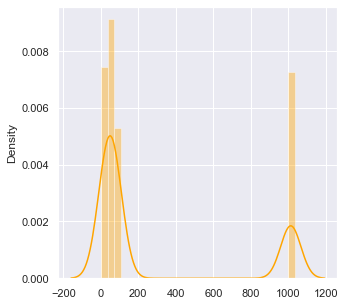

In [24]:
sns.set(rc={"figure.figsize":(5,5)})
sns.distplot(data_train, bins=30, color= "orange")
plt.show()

# Correlation

In [25]:
corr_df=data_train.copy()
corr_df["EP"]=y_train
corr_df.head()

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


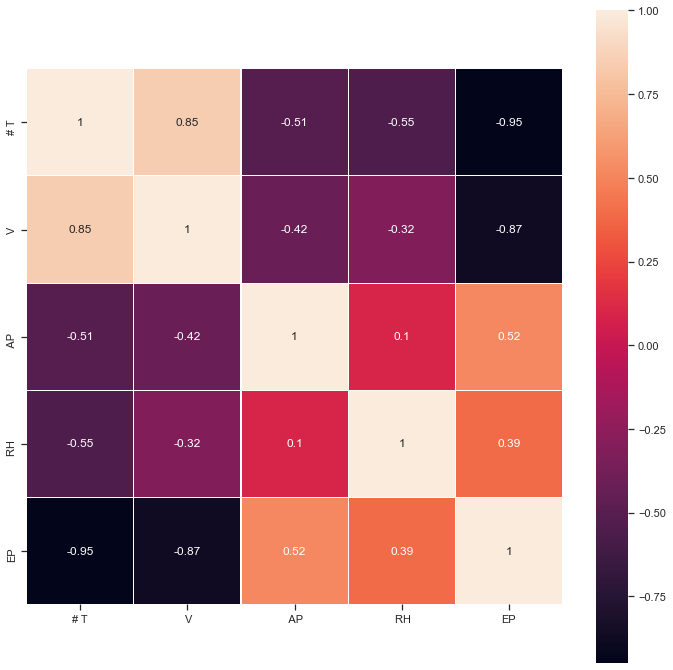

In [26]:
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(12,12))
sns.heatmap(corr_df.astype("float32").corr(), linewidths=0.1, square=True, annot=True)
plt.show()

# Features Plot

In [27]:
# Print all Features

data_train.columns

Index(['# T', ' V', ' AP', ' RH'], dtype='object')

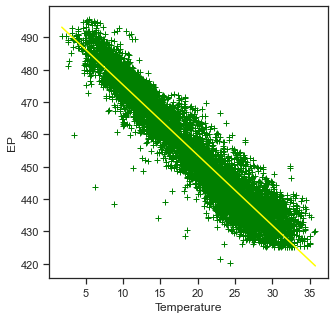

In [28]:
plt.plot(corr_df["# T"], corr_df["EP"], "+", color= "green")
plt.plot(np.unique(corr_df["# T"]), np.poly1d(np.polyfit(corr_df["# T"], corr_df["EP"], 1))
        (np.unique(corr_df["# T"])), color="yellow")
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("EP", fontsize=12)
plt.show()

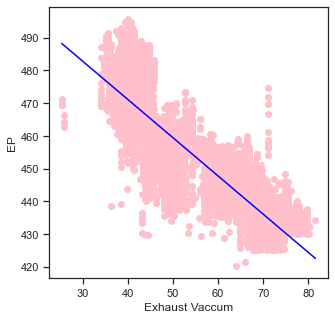

In [29]:
plt.plot(corr_df[" V"], corr_df["EP"], "o", color= "pink")
plt.plot(np.unique(corr_df[" V"]), np.poly1d(np.polyfit(corr_df[" V"], corr_df["EP"], 1))
        (np.unique(corr_df[" V"])), color="blue")
plt.xlabel("Exhaust Vaccum", fontsize=12)
plt.ylabel("EP", fontsize=12)

plt.show()

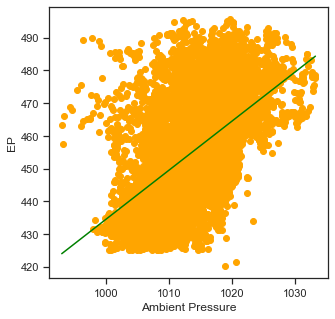

In [30]:
plt.plot(corr_df[" AP"], corr_df["EP"], "o", color= "orange")
plt.plot(np.unique(corr_df[" AP"]), np.poly1d(np.polyfit(corr_df[" AP"], corr_df["EP"], 1))
        (np.unique(corr_df[" AP"])), color="green")
plt.xlabel("Ambient Pressure", fontsize=12)
plt.ylabel("EP", fontsize=12)
plt.show()

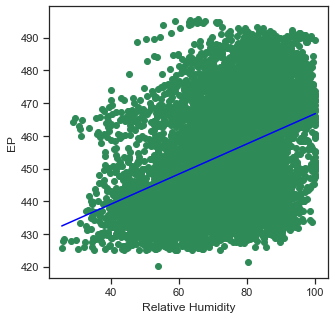

In [31]:
plt.plot(corr_df[" RH"], corr_df["EP"], "o", color= "seagreen")
plt.plot(np.unique(corr_df[" RH"]), np.poly1d(np.polyfit(corr_df[" RH"], corr_df["EP"], 1))
        (np.unique(corr_df[" RH"])), color="blue")
plt.xlabel("Relative Humidity", fontsize=12)
plt.ylabel("EP", fontsize=12)

plt.show()

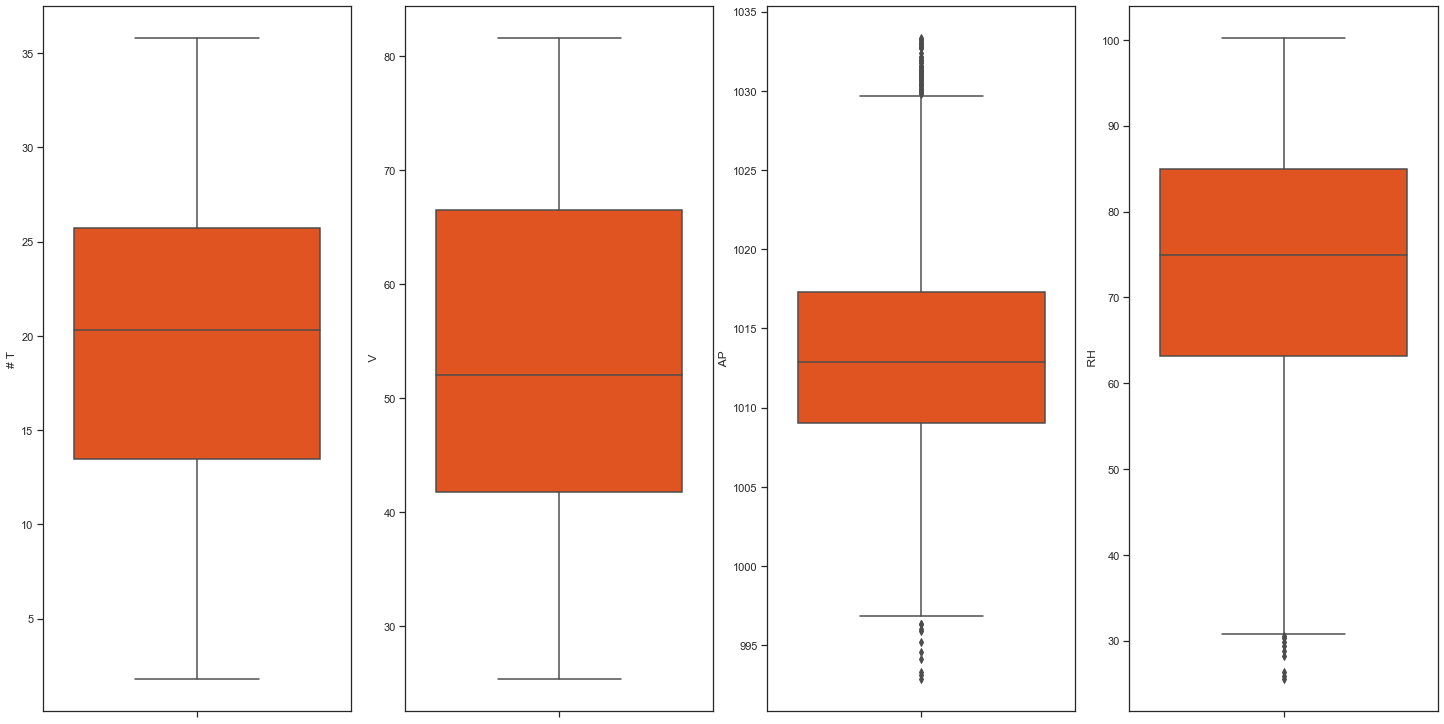

In [32]:
fig, ax=plt.subplots(ncols=4, nrows=1, figsize=(20,10))
index=0
ax=ax.flatten()
for i,v in data_train.items():
    sns.boxplot(y=i, data=data_train, ax=ax[index], color= "orangered")
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

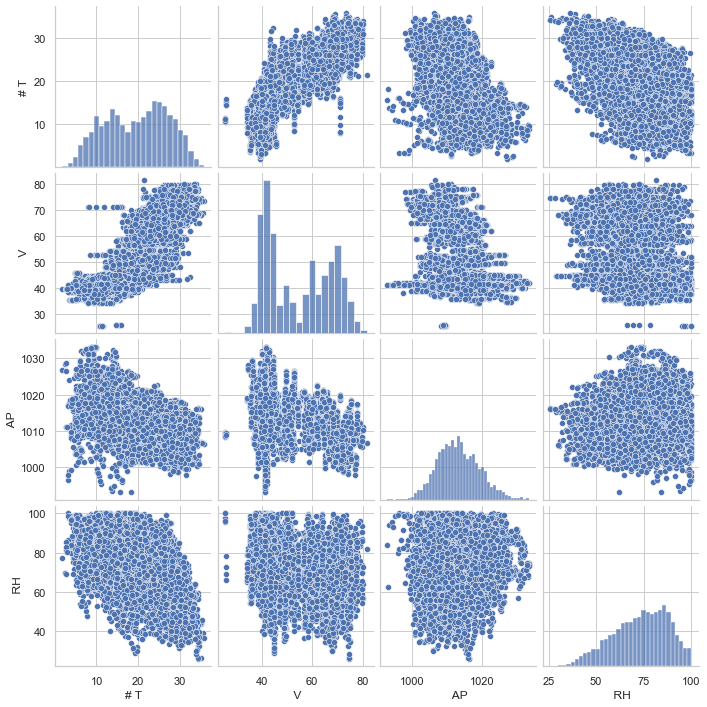

In [33]:
sns.set(style="whitegrid")
features_plot=data_train.columns

sns.pairplot(data_train[features_plot]);
plt.tight_layout
plt.show()

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit_transform(data_train)

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00]])

# Gradient Descent Model

In [35]:
x_train= data_train

In [36]:
x_train.shape, y_train.shape

((7176, 4), (7176,))

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)
gbr

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)

In [38]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)

In [43]:
x_test= np.genfromtxt(r"C:\Users\shruti\Desktop\Decodr Session Recording\Project\Decodr Project\Power Plant Data Analysis\test.csv", delimiter=",")
y_train.ravel(order="A")
y_pred=gbr.predict(x_test)

In [44]:
y_pred

array([472.48543507, 461.71928633, 434.22314744, ..., 443.59570999,
       457.24078238, 443.65087566])

# Model Evaluation

In [45]:
gbr.score(x_train, y_train)

0.998540993407853

# Saving the Prediction

In [46]:
np.savetxt("Predict_csv", y_pred, fmt="%.5f")